In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv


In [4]:
# import necessary lib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
import os
import pandas as pd
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [5]:
# import machine learning module
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

In [6]:
df = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv', encoding='latin1')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove or handle unnecessary columns (like Unnamed: 16 to Unnamed: 25)

In [7]:
# Identify missing values (NaN)
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64


Based on the output, we have identified missing values in various columns and a significant number of unnecessary columns (from Unnamed: 12 onwards). The next step is to:
- Remove unnecessary columns.
- Handle missing values in the remaining columns.

In [8]:
# Drop unnecessary columns (Unnamed: 12 to Unnamed: 25)
df.drop(columns=df.columns[12:], inplace=True)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
# Fill missing values with specific values or strategies
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('1900-01-01', inplace=True)  # Placeholder date
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown Duration', inplace=True)

# Verify the changes
missing_values_after = df.isna().sum()
print("Missing values in each column after handling:\n", missing_values_after)

Missing values in each column after handling:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [10]:
# Display the cleaned dataframe
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water      No Director   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans      No Director   
4      s5  TV Show           Kota Factory      No Director   

                                                cast        country  \
0                                            No Cast  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            No Cast        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [11]:
# Ensure appropriate data types
# Convert date_added to datetime, release_year to int, and duration to a more suitable format if possible
# First, convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# Convert 'release_year' to integer (it should already be int, but just to ensure)
df['release_year'] = df['release_year'].astype(int)

# Handle 'duration' column
# For simplicity, we'll keep it as a string, but we can also extract numerical values if needed for analysis
# Here, we can split the 'duration' column into two separate columns: 'duration_value' and 'duration_unit'
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('([a-zA-Z]+)')
df['duration_value'].fillna(0, inplace=True)

# Verify the changes
print("Data types of each column:\n", df.dtypes)
print("Missing values in each column after handling:\n", df.isna().sum())

# Display the cleaned dataframe
print(df.head())

Data types of each column:
 show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added        datetime64[ns]
release_year               int64
rating                    object
duration                  object
listed_in                 object
description               object
duration_value           float64
duration_unit             object
dtype: object
Missing values in each column after handling:
 show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added        98
release_year       0
rating             0
duration           0
listed_in          0
description        0
duration_value     0
duration_unit      0
dtype: int64
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show

# **Exploratory Data Analysis**

We will look into the following sections:
* Visualize the distribution of movies and TV shows.
* Analyze the release year trends.
* distribution of ratings.
* Look at the top countries producing content.


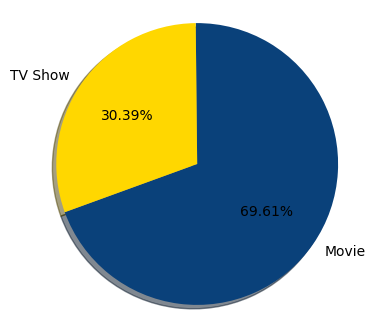

In [12]:
# Calculate the distribution of movies and TV shows
type_counts = df['type'].value_counts()
# Plot the distribution of movies and TV shows
# Plot the distribution as a pie chart
plt.figure(figsize=(4, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%', startangle=200, colors=['#0A417A','#FFD700'], shadow = True)
#plt.title('Distribution of Movies and TV Shows on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

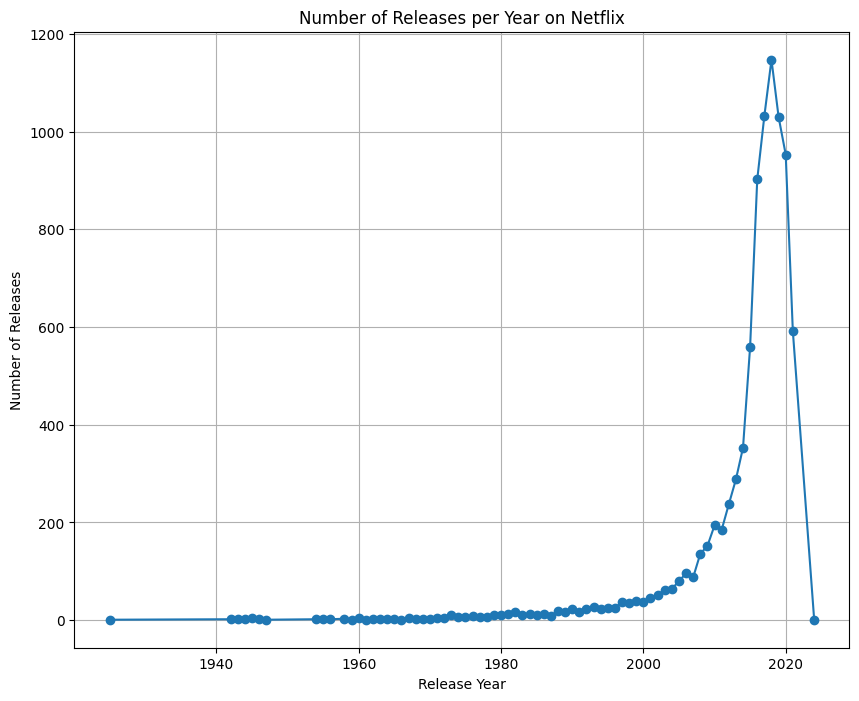

In [13]:
# Calculate the number of releases per year
release_year_counts = df['release_year'].value_counts().sort_index()

# Plot the release year trends
plt.figure(figsize=(10, 8))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', linestyle='-')
plt.title('Number of Releases per Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

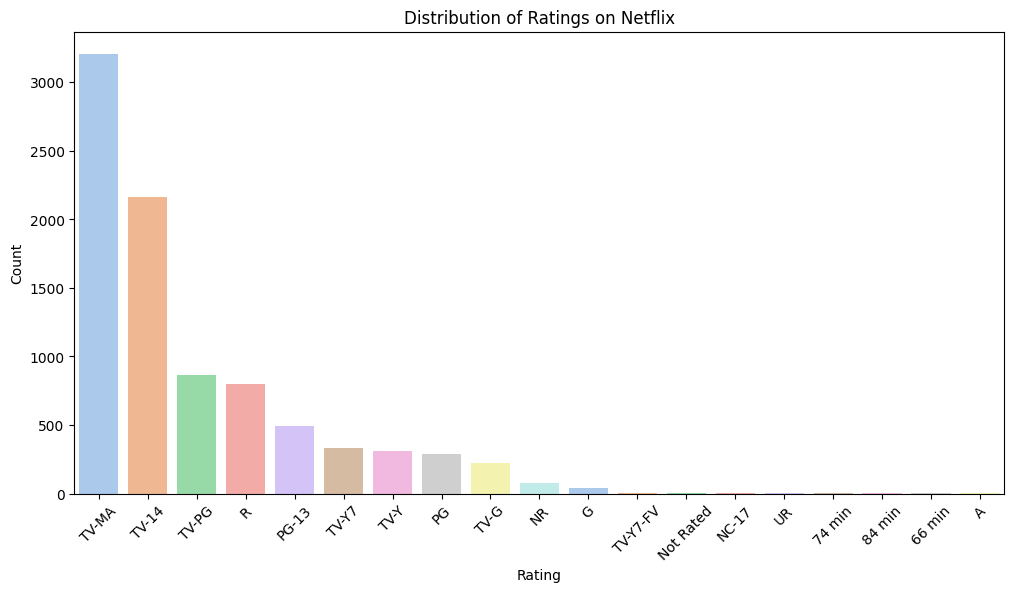

In [14]:
# Plot the distribution of ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', palette='pastel', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

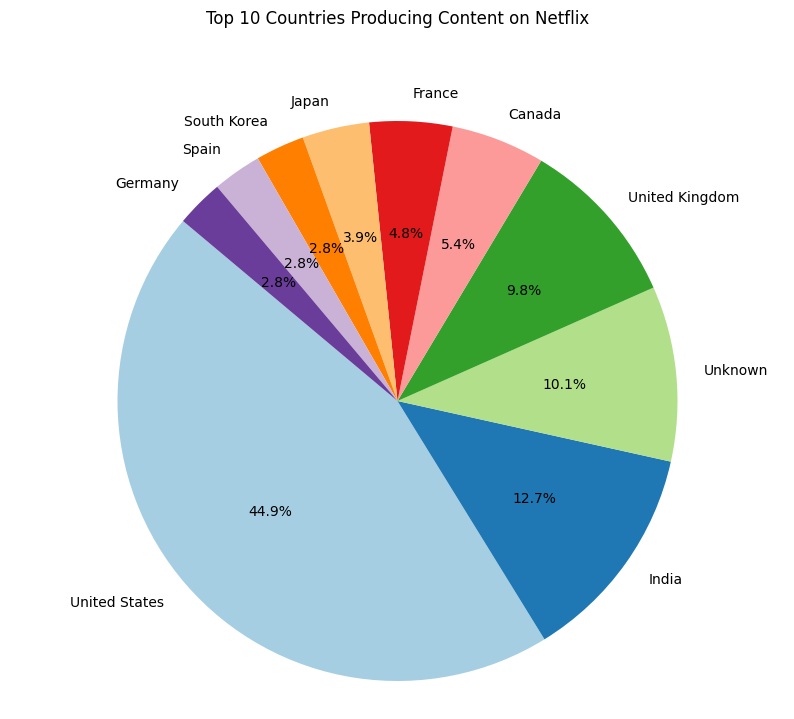

In [21]:
# Split the 'country' column to handle multiple countries listed
df['country'] = df['country'].apply(lambda x: x.split(', '))

# Explode the 'country' column to have one country per row
df = df.explode('country')

# Calculate the top countries producing content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Countries Producing Content on Netflix',y=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Number of Content Additions Over Time on Netflix

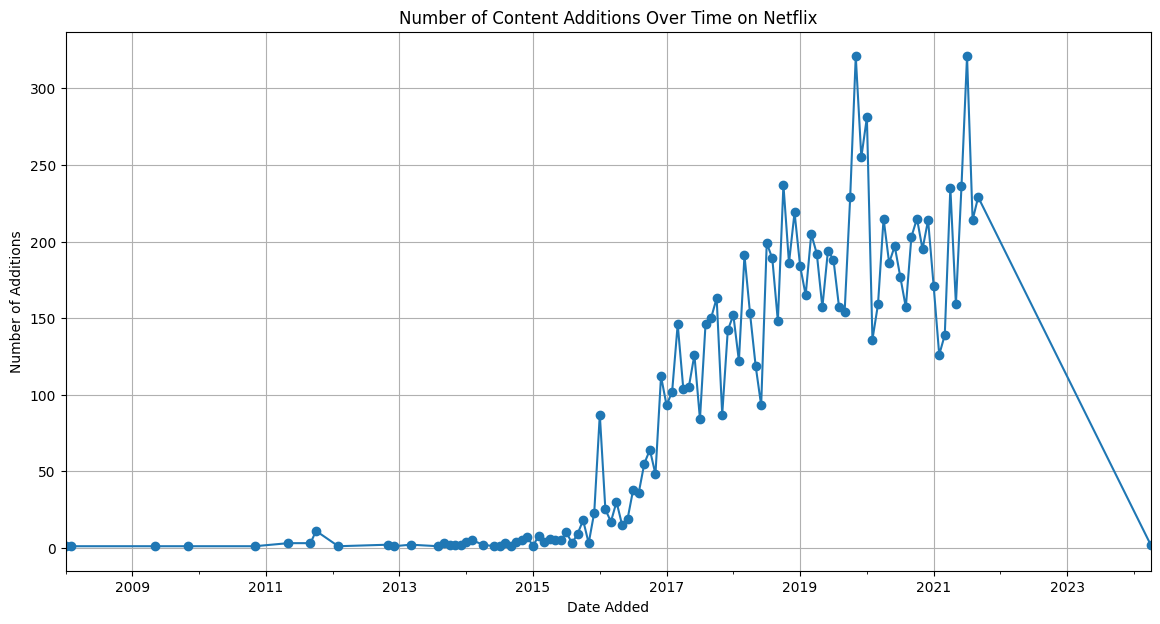

In [23]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.to_period('M')

# Calculate the number of additions per month
content_additions_per_month = df['month_added'].value_counts().sort_index()

# Plot the number of content additions over time
plt.figure(figsize=(14, 7))
content_additions_per_month.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Content Additions Over Time on Netflix')
plt.xlabel('Date Added')
plt.ylabel('Number of Additions')
plt.grid(True)
plt.show()

# Sentiment Analysis on Titles and Descriptions

Now we will perform sentiment analysis on the titles and descriptions of Netflix content using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool from the nltk library. First, we need to install the *nltk* library.

VADER sentiment analysis provides four different scores:

* Positive: The proportion of text that falls in the positive category.
* Neutral: The proportion of text that falls in the neutral category.
* Negative: The proportion of text that falls in the negative category.
* Compound: A single score that summarizes the overall sentiment of the text. The compound score ranges from -1 (most negative) to +1 (most positive).

In [24]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                   title  title_sentiment  \
0   Dick Johnson Is Dead          -0.8225   
1          Blood & Water           0.0000   
2              Ganglands           0.0000   
3  Jailbirds New Orleans           0.0000   
4           Kota Factory           0.0000   

                                         description  description_sentiment  
0  As her father nears the end of his life, filmm...                -0.2960  
1  After crossing paths at a party, a Cape Town t...                -0.1531  
2  To protect his family from a powerful drug lor...                -0.7783  
3  Feuds, flirtations and toilet talk go down amo...                 0.2263  
4  In a city of coaching centers known to train I...                 0.7430  


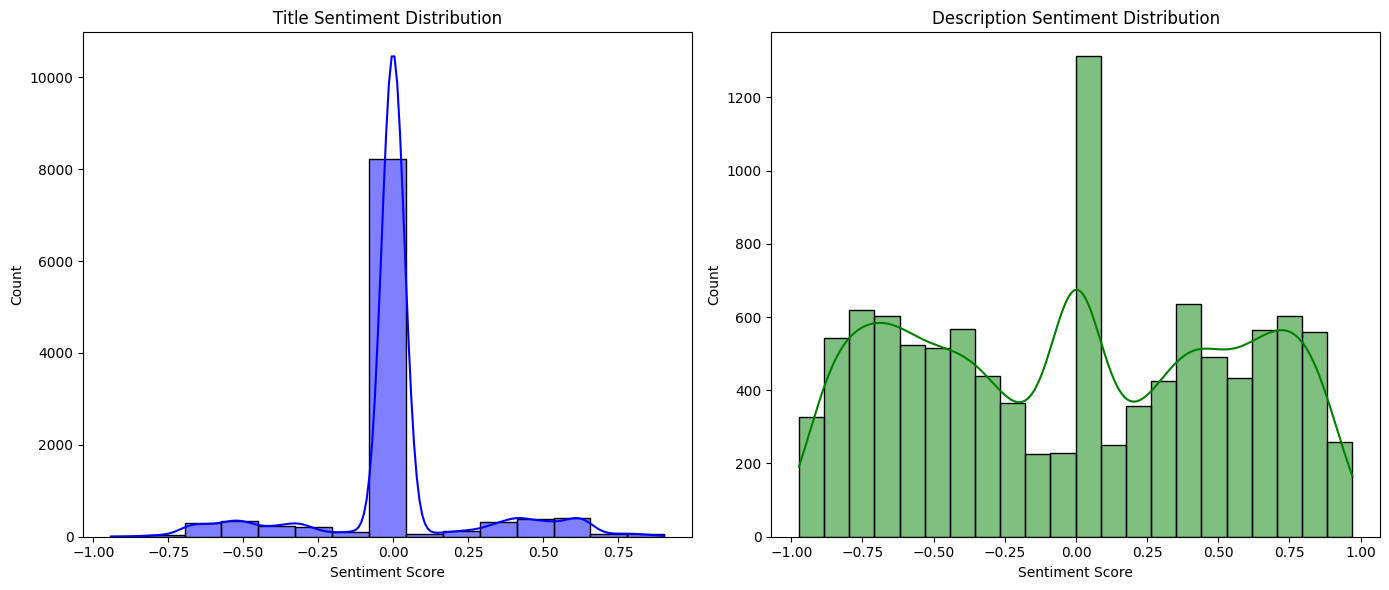

In [25]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    if pd.isna(text):
        return None
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis on titles and descriptions
df['title_sentiment'] = df['title'].apply(get_sentiment)
df['description_sentiment'] = df['description'].apply(get_sentiment)

# Display the results
print(df[['title', 'title_sentiment', 'description', 'description_sentiment']].head())

# Plotting the sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Title sentiment distribution
plt.subplot(1, 2, 1)
sns.histplot(df['title_sentiment'].dropna(), kde=True, color='blue')
plt.title('Title Sentiment Distribution')
plt.xlabel('Sentiment Score')

# Description sentiment distribution
plt.subplot(1, 2, 2)
sns.histplot(df['description_sentiment'].dropna(), kde=True, color='green')
plt.title('Description Sentiment Distribution')
plt.xlabel('Sentiment Score')

plt.tight_layout()
plt.show()


We've used the compound score to represent the sentiment of the titles and descriptions.
Analysis of the Results
Let's look at the sentiment scores for the first few rows:

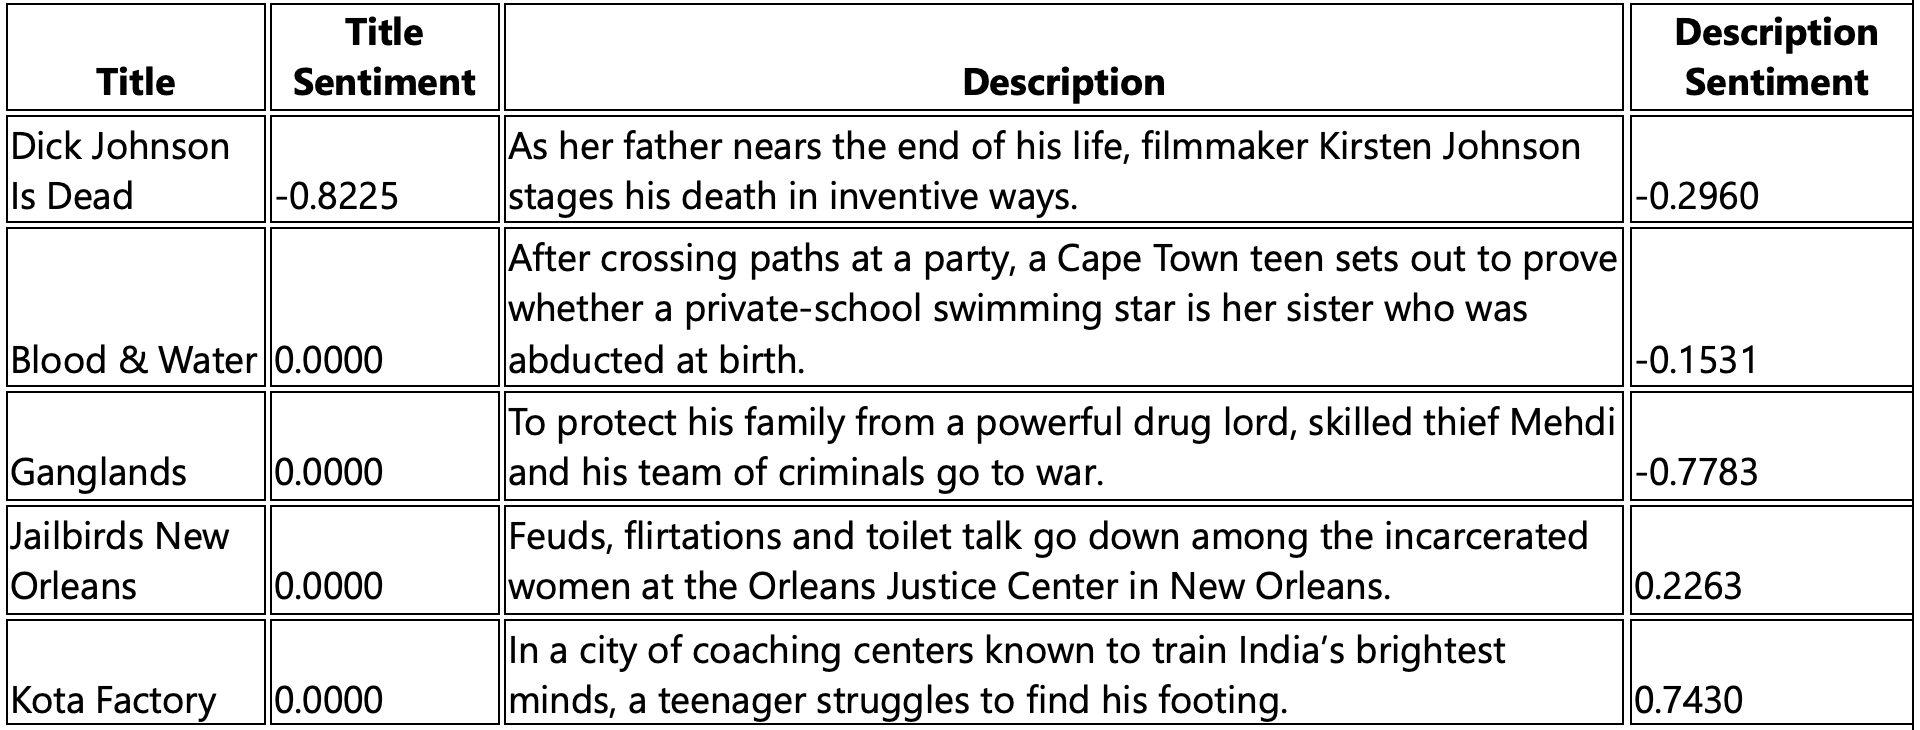


# Interpretation

1. Title Sentiment:

    *     **Dick Johnson Is Dead:** The title sentiment score is -0.8225, indicating a strongly negative sentiment. This is likely because the title contains the word "Dead", which has a negative connotation.
    *     **Blood & Water, Ganglands, Jailbirds New Orleans, Kota Factory:** The title sentiment scores are 0.0000, indicating neutral sentiment. These titles do not contain words that strongly influence sentiment analysis either way.

2. Description Sentiment:

    *     **Dick Johnson Is Dead:** The description sentiment score is -0.2960, indicating a slightly negative sentiment. This makes sense given the subject matter of staging a father’s death.
    *     **Blood & Water:** The description sentiment score is -0.1531, indicating a slightly negative sentiment. The description includes themes of abduction and searching for a lost sibling, which may contribute to the negative score.
    *     **Ganglands:** The description sentiment score is -0.7783, indicating a strongly negative sentiment. Themes of crime and conflict likely contribute to this score.
    *     **Jailbirds New Orleans:** The description sentiment score is 0.2263, indicating a slightly positive sentiment. Despite being set in a jail, the mention of "feuds, flirtations, and toilet talk" gives a less serious tone, leading to a more neutral or slightly positive sentiment.
    *     **Kota Factory:** The description sentiment score is 0.7430, indicating a positive sentiment. This description talks about a teenager striving to find his footing, which has a positive connotation.
